In [52]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy import stats as st
import csv
from sklearn import metrics

def ComputekNN(x,traindat,k,fnum):
    dist = [];
    for i in range(0,len(traindat)):
        y = np.array([traindat[i,0:fnum]]);
        dist.append(np.linalg.norm(x-y));
    
    # find k smallest distances
    dist = np.array(dist);
    idx = np.argpartition(dist, k);
    # find corresponding classes
    class_k = traindat[idx[:k],fnum];
    #take mode 
    class_ret = st.mode(class_k);
    conf = sum(np.array(class_k == class_ret.mode))/k;
    if class_ret ==0:
        conf = 1-conf;
    return class_ret.mode, conf;

def ComputeGrad(x,y,theta):
    grad = (-y*x*np.exp(np.matmul(np.transpose(-theta),x)))/(1+np.exp(np.matmul(np.transpose(-theta),x)))\
         + (1-y)*x*(np.exp(np.matmul(np.transpose(-2*theta),x)))/(1+np.exp(np.matmul(np.transpose(-theta),x)))**3;
    return grad ;

def LogisticRegression(init, train,n):
    theta = np.transpose(init);
    for j in range(0,n):
        for i in range(0,1000):
            theta = ComputeGrad(train[i,0:3000],train[i,3000],init)+theta;
        init = np.transpose(init)- 0.1*(theta/1000);
        init = init[0];
        theta = np.zeros([1,3000]);
    return init;
        

x = np.array([1, 3, 2]);
theta = np.array([0,0,0]);
y = 1;
print(ComputeGrad(x,y,theta))
   

[-0.5 -1.5 -1. ]


/var/folders/_f/jxd8d57d641gld_fttthhb4m0000gn/T/ipykernel_44972/929948027.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  class_ret = st.mode(class_k);


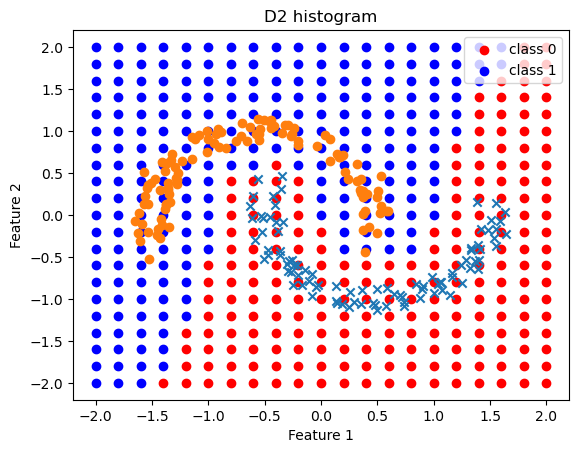

In [3]:
fname = 'data/D2z.txt';
array = [];
with open(fname) as f:
    array.append([float(x) for x in next(f).split()]) # read first line
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()]);
array = np.array(array);

d = [];
f = np.linspace(-2,2,21);
x_0 = [];
y_0 = [];
x_1 = [];
y_1 = [];
xt_0 = [];
yt_0 = [];
xt_1 = [];
yt_1 = [];

X,Y = np.meshgrid(f,f);
for k in range(0,len(f)):
    for l in range(0,len(f)):
        d,c = (ComputekNN([X[k,l],Y[k,l]],array,5,2));
        if d ==0:
            x_0.append(X[k,l]);
            y_0.append(Y[k,l]);
        else:
            x_1.append(X[k,l]);
            y_1.append(Y[k,l]); 

for m in range(0,len(array)):
    if array[m,2]==0:
            xt_0.append(array[m,0]);
            yt_0.append(array[m,1]);
    else:
            xt_1.append(array[m,0]);
            yt_1.append(array[m,1]);

# create plot
plt.scatter(x_0,y_0,color = 'r',label = 'class 0');
plt.scatter(x_1,y_1,color ='b',label = 'class 1');
# add training data for plot
plt.scatter(xt_0,yt_0,marker='x')
plt.scatter(xt_1,yt_1,marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('D2 histogram')
plt.legend()


In [4]:
# read in email data
with open('data/emails.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

array = np.zeros([len(data)-1,3001]);
for i in range(1,len(data)):
    for j in range(1,3002):
        array[i-1,j-1] = eval(data[i][j]);

#print(data[0][0])


In [98]:
# Now run k-means with emais and 5 fold cross validation
Ks = np.array([1,3,5,7,10]);
accuracy = [];
precision = [];
recall = [];
count = 0;
yscore = [];
truelabel = [];
ylabel = [];
for k in Ks:
    accuracy.append([]);
    precision.append([])
    recall.append([]);
    yscore.append([]);
    truelabel.append([]);
    ylabel.append([]);
    for s in range(0,5):
        traindat = array[s*1000:(s+1)*1000,:];
        if s>0 & s<4:
            a1 = np.linspace(0,s*1000-1,(s)*1000);
            a2 = np.linspace((s+1)*1000,5000-1,5000-((s+1)*1000));
            ind = np.concatenate((a1, a2));
            ind = (np.rint(ind)).astype(int);   
            testdat = array[ind,:];
        elif s==0:
            testdat = array[1001:5000,:];
        else:
            testdat = array[0:4000,:];
        tp = 0;
        tn = 0;
        fp = 0;
        fn = 0;
        for t in range(0,1000):
            newclass,conf = (ComputekNN(testdat[t,0:3000],traindat,k,3000));
            yscore[count].append(conf);
            truelabel[count].append(testdat[t,3000]);
            ylabel[count].append(newclass);

            if newclass == testdat[t,3000]:
                if newclass ==0:
                    tn = tn+1;
                else:
                    tp = tp+1;
            else:
                if newclass ==0:
                    fn = fn+1;
                else:
                    fp = fp+1;

        accuracy[count].append((tp+tn)/(tp+tn+fp+fn));
        precision[count].append(tp/(tp+fp));
        recall[count].append(tp/(tp+fn));
    count = count+1;



/var/folders/_f/jxd8d57d641gld_fttthhb4m0000gn/T/ipykernel_44972/1560328314.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  class_ret = st.mode(class_k);


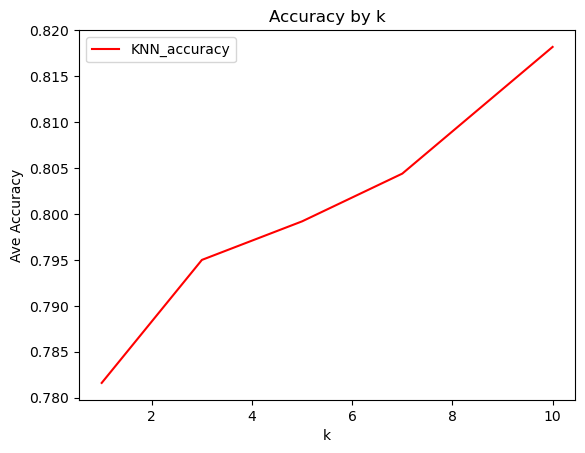

In [103]:
av = [];
for i in range(0,5):
    av.append(sum(accuracy[i])/5)

# create plot
plt.plot(Ks,av,color = 'r',label = 'KNN_accuracy');
plt.xlabel('k')
plt.ylabel('Ave Accuracy')
plt.title('Accuracy by k')
plt.legend()

In [96]:
# Logistic Regression

logaccuracy = [];
logprecision = [];
logrecall = [];
count = 0;
yscorelog = [];
ylabellog = [];

for s in range(0,5):
    traindat = array[s*1000:(s+1)*1000,:];
    if s>0 & s<4:
        a1 = np.linspace(0,s*1000-1,(s)*1000);
        a2 = np.linspace((s+1)*1000,5000-1,5000-((s+1)*1000));
        ind = np.concatenate((a1, a2));
        ind = (np.rint(ind)).astype(int);   
        testdat = array[ind,:];
    elif s==0:
        testdat = array[1001:5000,:];
    else:
        testdat = array[0:4000,:];
    tp = 0;
    tn = 0;
    fp = 0;
    fn = 0;
    init = np.zeros([3000,1]);
    theta = LogisticRegression(init, traindat,100);
    for t in range(0,1000):
        x = -1*testdat[t,0:3000];
        conf = 1/(1+np.exp(np.matmul((1/3000)*np.transpose(theta),x)));
        if (conf-0.5)/0.1>0.5:
            newclass = 1;
        else:
            newclass = 0;
        yscorelog.append(conf);
        ylabellog.append(newclass);

        if newclass == testdat[t,3000]:
            if newclass ==0:
                tn = tn+1;
            else:
                tp = tp+1;
        else:
            if newclass ==0:
                fn = fn+1;
            else:
                fp = fp+1;

    logaccuracy.append((tp+tn)/(tp+tn+fp+fn));
    if (tp+fp>0):
        logprecision.append(tp/(tp+fp));
    logrecall.append(tp/(tp+fn));



[0.679, 0.686, 0.706, 0.66, 0.637]
[0.36419753086419754, 0.3858267716535433, 0.45161290322580644, 0.35294117647058826, 0.3401639344262295]
[0.21299638989169675, 0.17192982456140352, 0.14736842105263157, 0.23157894736842105, 0.2912280701754386]


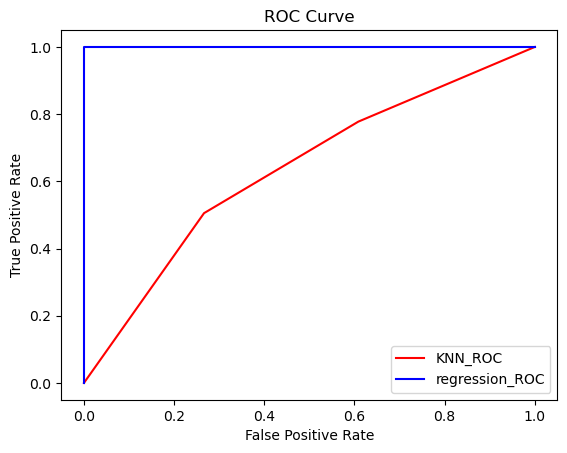

In [97]:
print(logaccuracy)
print(logprecision)
print(logrecall)
#print(np.unique(yscore[2]))

#print(accuracy[0])
#print(precision[0])
#print(recall[0])

# ROC Curve
score = np.array(yscore[2]);
label = np.array(ylabel[2]);
fpr, tpr, thresholds = metrics.roc_curve(label, score);
fprl, tprl,thresholdsl = metrics.roc_curve(ylabellog,yscorelog)

#print(ylabellog)
# create plot
plt.plot(tpr,fpr,color = 'r',label = 'KNN_ROC');
plt.plot(fprl,tprl,color = 'b',label = 'regression_ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


In [115]:
# Now run k-means with emails 1001-2000 as training set
traindat = array[0:4000,:];
testdat = array[4000:5000,:];
tp = 0;
tn = 0;
fp = 0;
fn = 0;
for t in range(0,1000):
    newclass = (ComputekNN(testdat[t,0:3000],traindat,1,3000));
    if len(newclass)>1:
        newclass = newclass[0];
    if newclass == testdat[t,3000]:
        if newclass ==0:
            tn = tn+1;
        else:
            tp = tp+1;
    else:
        if newclass ==0:
            fn = fn+1;
        else:
            fp = fp+1;

accuracy = (tp+tn)/(tp+tn+fp+fn);
prec = tp/(tp+fp);
recall = tp/(tp+fn);
print(accuracy)
print(prec)
print(recall)

/var/folders/_f/jxd8d57d641gld_fttthhb4m0000gn/T/ipykernel_44972/1560328314.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  class_ret = st.mode(class_k);


0.775
0.6057441253263708
0.7581699346405228
